<a href="https://colab.research.google.com/github/ilyachti/statprac/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

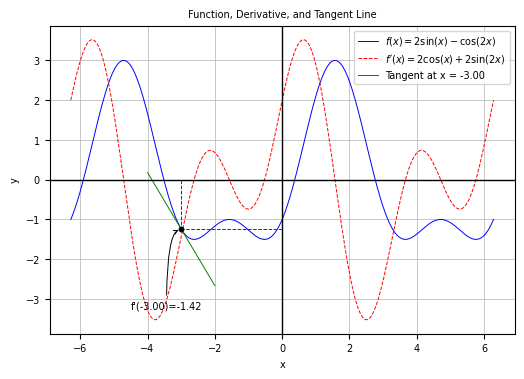

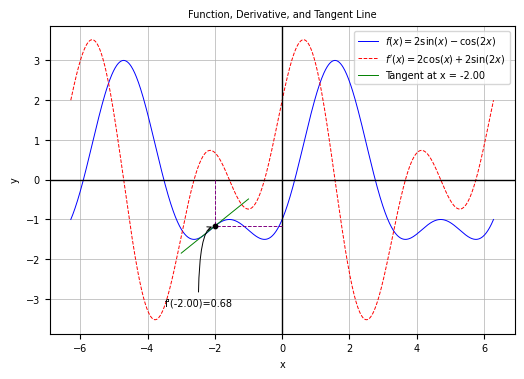

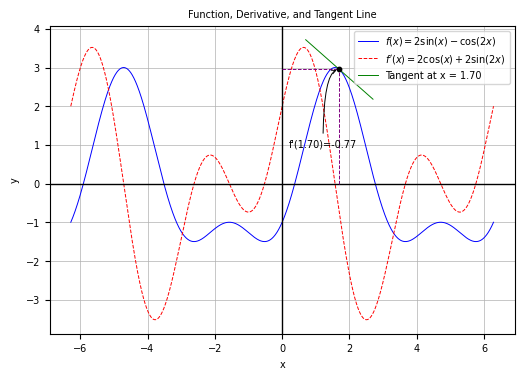

In [134]:
import numpy as np
import matplotlib.pyplot as plt

def beauty_derivative_plot(x):
    def f(x):
      return 2*np.sin(x) - np.cos(2*x)
    def f_prime(x):
      return 2*np.cos(x) + 2*np.sin(2*x)

    x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    y_values = f(x_values)
    y_prime_values = f_prime(x_values)
    tangent_range = np.linspace(x - 1, x + 1, 200)
    tangent_line = f(x) + f_prime(x)*(tangent_range - x)
    plt.figure(figsize=(6, 4))
    plt.plot(x_values, y_values, 'b', label = r'$f(x) = 2\sin(x) - \cos(2x)$', linewidth=0.7)
    plt.plot(x_values, y_prime_values, 'r--', label = r"$f'(x) = 2\cos(x) + 2\sin(2x)$", linewidth=0.7)
    plt.plot(tangent_range, tangent_line, 'g', label = f'Tangent at x = {x:.2f}', linewidth=0.7)
    plt.axhline(0, color='black', linewidth=1)  # x-axis
    plt.axvline(0, color='black', linewidth=1)  # y-axis

    plt.scatter(x, f(x), color='black', zorder = 5, s = 10)
    plt.plot([x, x], [0, f(x)], color = 'purple', linestyle = '--', linewidth=0.7)
    plt.plot([0, x], [f(x), f(x)], color='purple', linestyle='--', linewidth=0.7)
    plt.grid(True, linewidth=0.5)
    plt.title('Function, Derivative, and Tangent Line', fontsize=7)
    plt.legend(loc='upper right', fontsize=7)
    plt.xlabel('x', fontsize = 7)
    plt.ylabel('y', fontsize = 7)
    arrowprops = {
        'arrowstyle': '->',
        'connectionstyle': 'angle3',
        'linewidth': 0.7
    }
    plt.annotate(f"f'({x:.2f})={f_prime(x):.2f}", xy=(x, f(x)), xytext=(x - 1.5, f(x) - 2), arrowprops=arrowprops, fontsize = 7)
    plt.xticks(fontsize = 7)
    plt.yticks(fontsize = 7)

    plt.show

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)


## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

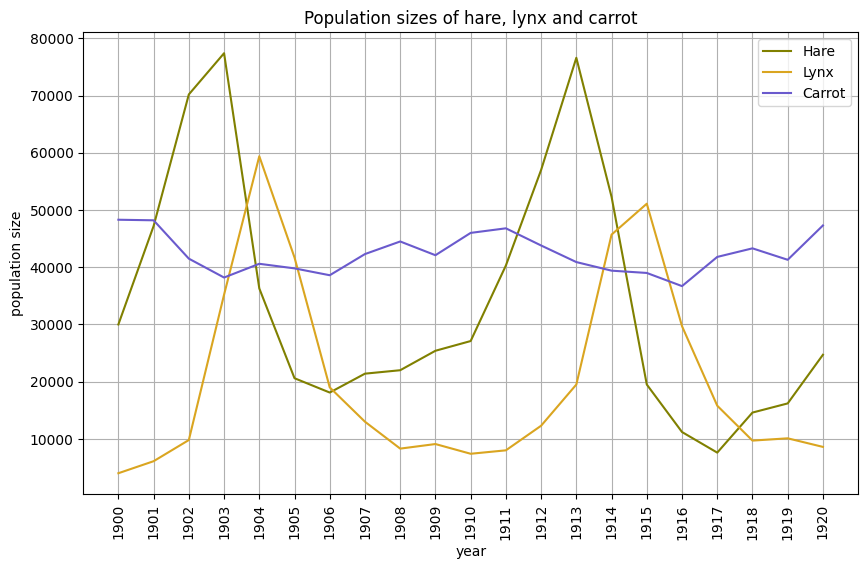

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
plt.figure(figsize=(10, 6))
plt.plot(years, hare, label='Hare', color = 'olive')
plt.plot(years, lynx, label='Lynx', color = 'goldenrod')
plt.plot(years, carrot, label='Carrot', color = 'slateblue')
plt.legend()
plt.grid(True)
plt.xlabel('year')
plt.ylabel('population size')
plt.xticks(range(1900, 1921, 1), rotation = 90)
plt.title('Population sizes of hare, lynx and carrot')
plt.show()



- Find which year each species had the largest population. Mark these years in the plot of populations.

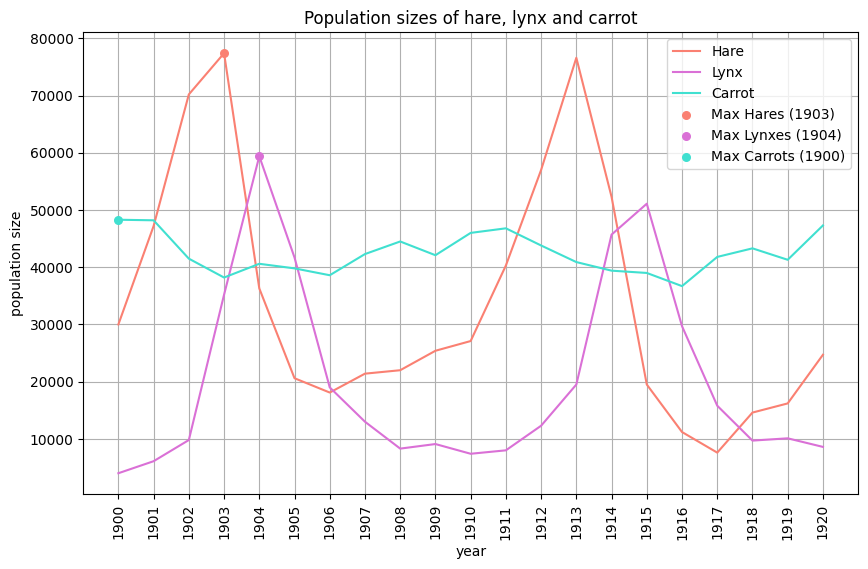

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]
plt.figure(figsize=(10, 6))
plt.plot(years, hare, label='Hare', color = 'salmon')
plt.plot(years, lynx, label='Lynx', color = 'orchid')
plt.plot(years, carrot, label='Carrot', color = 'turquoise')


max_hare_year = years[np.argmax(hare)]
max_lynx_year = years[np.argmax(lynx)]
max_carrot_year = years[np.argmax(carrot)]

plt.scatter(max_hare_year, np.max(hare), color='salmon', s=30, label=f'Max Hares ({int(max_hare_year)})', zorder=5)
plt.scatter(max_lynx_year, np.max(lynx), color='orchid', s=30, label=f'Max Lynxes ({int(max_lynx_year)})', zorder=5)
plt.scatter(max_carrot_year, np.max(carrot), color='turquoise', s=30, label=f'Max Carrots ({int(max_carrot_year)})', zorder=5)

plt.legend()
plt.grid(True)
plt.xlabel('year')
plt.ylabel('population size')
plt.xticks(range(1900, 1921, 1), rotation = 90)
plt.title('Population sizes of hare, lynx and carrot')

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

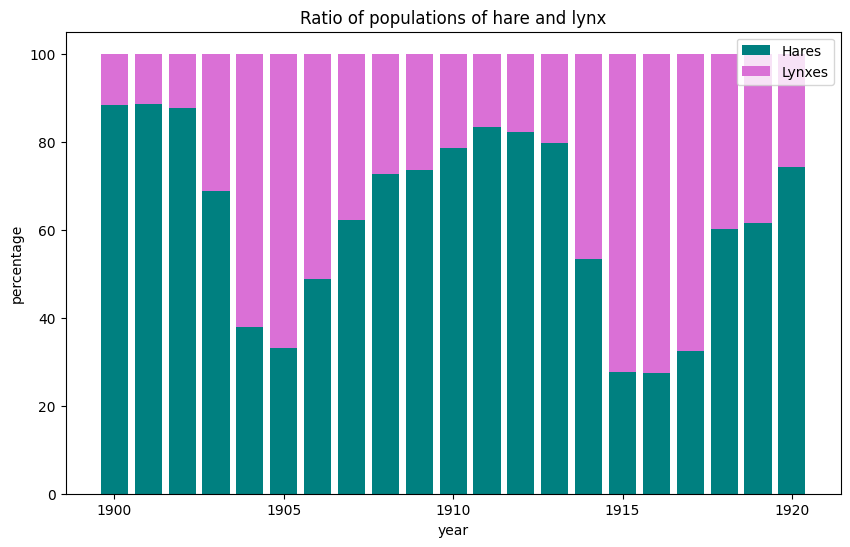

In [132]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]

total = hare + lynx
hare_ratio = hare / total * 100
lynx_ratio = lynx / total * 100

plt.figure(figsize=(10,6))
plt.bar(years, hare_ratio, color='teal', label='Hares')
plt.bar(years, lynx_ratio, color='orchid', label='Lynxes', bottom = hare_ratio)

plt.legend()
plt.xlabel("year")
plt.ylabel('percentage')
plt.title('Ratio of populations of hare and lynx')

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

hare mean:  34080.95238095238
lynx mean:  20166.666666666668
carrot mean:  42400.0
hare std:  20897.906458089667
lynx std:  16254.591536908763
carrot std:  3322.5062255844787


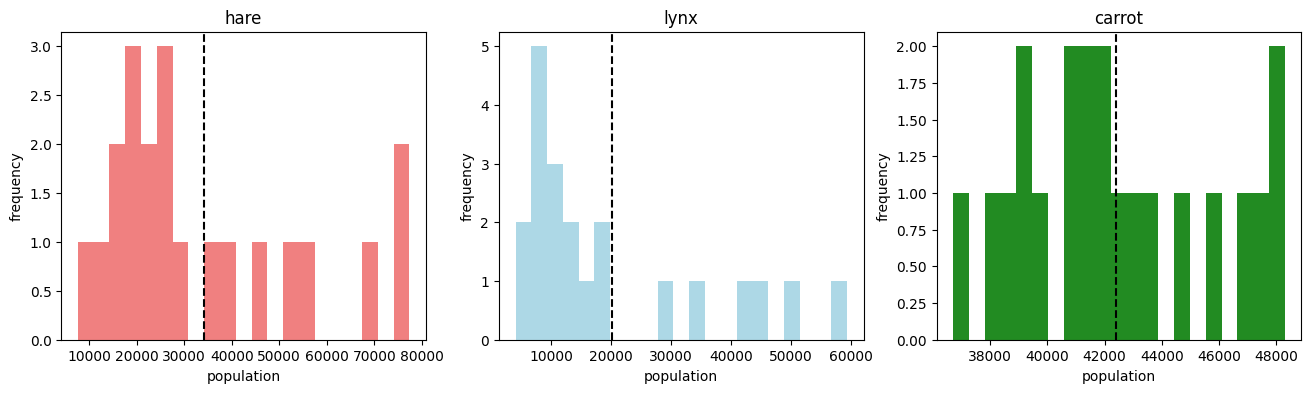

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('populations.txt')
years = data[:, 0]
hare = data[:, 1]
lynx = data[:, 2]
carrot = data[:, 3]

hare_mean = np.mean(hare)
lynx_mean = np.mean(lynx)
carrot_mean = np.mean(carrot)
print('hare mean: ', hare_mean)
print('lynx mean: ', lynx_mean)
print('carrot mean: ', carrot_mean)

hare_std = np.std(hare)
lynx_std = np.std(lynx)
carrot_std = np.std(carrot)
print('hare std: ', hare_std)
print('lynx std: ', lynx_std)
print('carrot std: ', carrot_std)

fig, axs = plt.subplots(1, 3, figsize = (16, 4))
n_bins = np.size(years)
axs[0].hist(hare, color = 'lightcoral', bins = n_bins)
axs[0].axvline(hare_mean, color = 'black', linestyle = '--')
axs[0].set_title('hare')
axs[0].set_xlabel('population')
axs[0].set_ylabel('frequency')

axs[1].hist(lynx, color = 'lightblue', bins = n_bins)
axs[1].axvline(lynx_mean, color = 'black', linestyle = '--')
axs[1].set_title('lynx')
axs[1].set_xlabel('population')
axs[1].set_ylabel('frequency')

axs[2].hist(carrot, color = 'forestgreen', bins = n_bins)
axs[2].axvline(carrot_mean, color = 'black', linestyle = '--')
axs[2].set_title('carrot')
axs[2].set_xlabel('population')
axs[2].set_ylabel('frequency')

plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


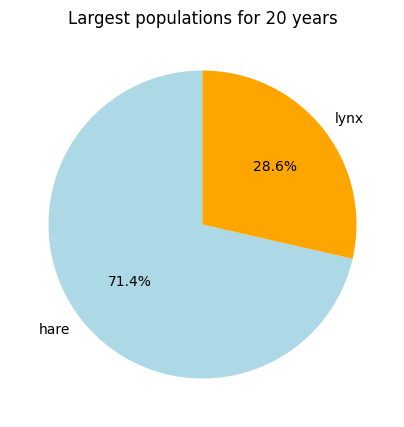

In [ ]:
result = np.where(hare > lynx, 'H', 'L')
print(result)

h_count = np.sum(result == 'H')
l_count = np.sum(result == 'L')
plt.figure(figsize=(5, 5))
plt.pie([h_count, l_count], labels = ['hare', 'lynx'], colors = ['lightblue', 'orange'], autopct='%1.1f%%', startangle = 90)
plt.title('Largest populations for 20 years')
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

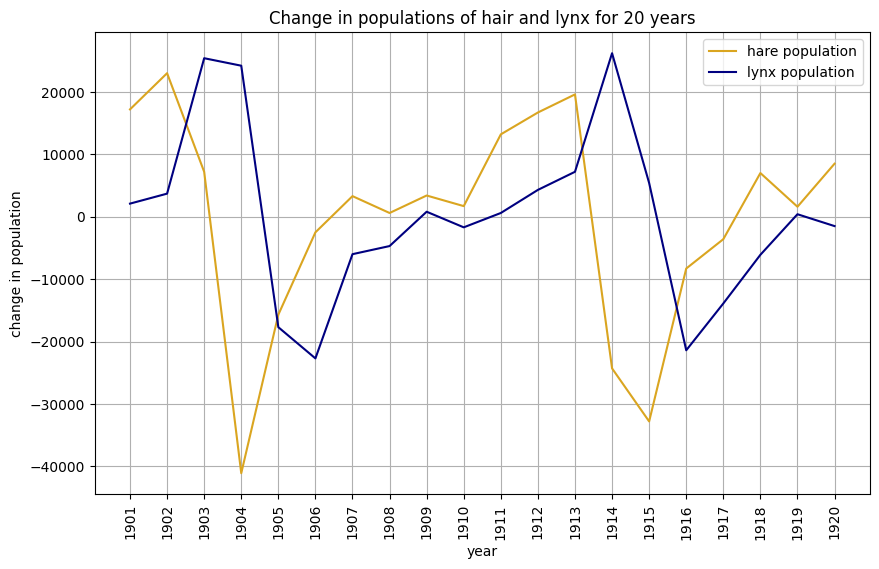

Correlation between hare and lynx population changes: -0.18


In [ ]:
hare_change = np.diff(hare)
lynx_change = np.diff(lynx)
plt.figure(figsize=(10, 6))
plt.plot(years[1:], hare_change, label='hare population', color='goldenrod')
plt.plot(years[1:], lynx_change, label='lynx population', color='navy')

plt.xlabel('year')
plt.ylabel('change in population')
plt.title('Change in populations of hair and lynx for 20 years')
plt.xticks(range(1901, 1921, 1), rotation = 90)
plt.grid(True)
plt.legend()
plt.show()

corr = np.corrcoef(hare_change, lynx_change)[0, 1]
print(f"Correlation between hare and lynx population changes: {corr:.2f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

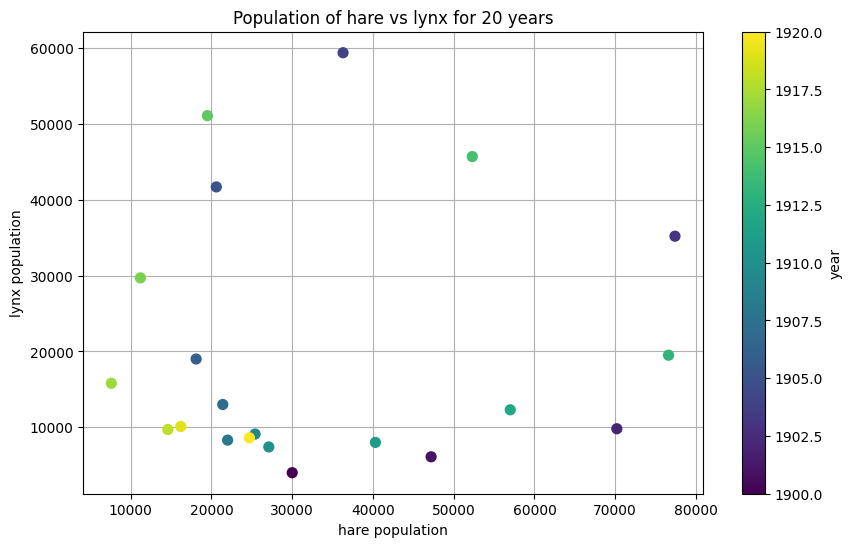

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(hare, lynx, c=years, cmap='viridis', s=50, zorder = 5)

plt.xlabel('hare population')
plt.ylabel('lynx population')
plt.title('Population of hare vs lynx for 20 years')

plt.colorbar(scatter, label='year')

plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [ ]:
coef = np.polyfit(years[:-1], hare[:-1], 1)
a, b = coef
estimated = a * years[-1] + b
error = np.abs(estimated - hare[-1]) / hare[-1]

print('estimated value: ', estimated)
print('real value: ', hare[-1])
print('error: ', error)

estimated value:  19775.789473683108
real value:  24700.0
error:  0.19936075005331547
